<a href="https://colab.research.google.com/github/trailmarkerlib/policeProjectPythonWorkshop/blob/main/python_workshop_marijuana_arrest_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grief to Action Python Workshop: Jan 17, 2024

## Pittsburgh Police Arrest Data
Data</br>
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True</br></br>

## Pittsburgh Police Non-Traffic Citation Data
Data</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/ec71e915-cd01-4281-86c0-2d3a06701616


## Objectives of this Notebook

After reviewing this notebook, you will establish a foundation for further learning and exploration of the following concepts

*   Common Python packages
*   Reading data from a CSV file
*   Exploring and aggregating data


## Import packages

https://learnpython.com/blog/python-libraries-for-beginners/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import json
import requests

## Read WPRDC arrest data from downloaded CSV file

In [3]:
arr_url = 'https://raw.githubusercontent.com/trailmarkerlib/pythonWorkshop/main/data/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv'

In [4]:
arr_df = pd.read_csv(arr_url)

<ipython-input-4-ae92c019c06a>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  arr_df = pd.read_csv(arr_url)


In [5]:
arr_df = pd.read_csv(arr_url, low_memory = False)

### Explore arrest data

#### Display information about the dataset

The info() method returns the number of rows as 'entries,' the number of columns, and the column names and datatypes.

In [6]:
arr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65659 entries, 0 to 65658
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    65659 non-null  int64  
 1   PK                     65659 non-null  int64  
 2   CCR                    65659 non-null  int64  
 3   AGE                    65256 non-null  float64
 4   GENDER                 65659 non-null  object 
 5   RACE                   65659 non-null  object 
 6   ARRESTTIME             65659 non-null  object 
 7   ARRESTLOCATION         65659 non-null  object 
 8   OFFENSES               65656 non-null  object 
 9   INCIDENTLOCATION       65659 non-null  object 
 10  INCIDENTNEIGHBORHOOD   63199 non-null  object 
 11  INCIDENTZONE           65559 non-null  object 
 12  INCIDENTTRACT          63222 non-null  float64
 13  COUNCIL_DISTRICT       55592 non-null  float64
 14  PUBLIC_WORKS_DIVISION  55592 non-null  float64
 15  X 

#### Display the shape of the dataset: number of rows and columns

The shape property is a tuple with row and column counts: (rows, columns).

In [7]:
arr_df.shape

(65659, 17)

#### Display a set of rows from the top or bottom of the dataset

The head() method returns the first 5 rows of the dataset. If a number is entered inside the parenthesis, a corresponding number of rows from the top of the dataset is returned.

The tail() method works the same way but returns rows from the bottom of the dataset.




In [8]:
arr_df.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [9]:
arr_df.tail(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
65649,86980,2063187,23150661,66.0,F,W,2023-09-22T16:30:00,"600 Block 1st AV Pittsburgh, PA 15219",5104 Resisting Arrest or Other Law Enforcement...,"700 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1918.0,4.0,5.0,-80.021696,40.394591
65650,86981,2063188,23153361,21.0,M,B,2023-10-28T13:10:00,"1400 Block Washington BL Pittsburgh, PA 15206",2701 Simple Assault. / 2705 Recklessy Endanger...,"Saw Mill Run BL & Bausman ST Pittsburgh, PA 15226",Bon Air,3,1806.0,4.0,5.0,-80.006071,40.411077
65651,86982,2063189,23150691,34.0,F,B,2023-09-21T22:00:00,"1700 Block Belleau DR Pittsburgh, PA 15212",2701(a)(3) Simple Assault - Attempts by Physic...,"1700 Block Belleau DR Pittsburgh, PA 15212",Fineview,1,2509.0,6.0,1.0,-80.006983,40.460311
65652,86983,2063190,23150691,39.0,F,B,2023-09-21T21:50:00,"1700 Block Belleau DR Pittsburgh, PA 15212",2701(a)(3) Simple Assault - Attempts by Physic...,"1700 Block Belleau DR Pittsburgh, PA 15212",Fineview,1,2509.0,6.0,1.0,-80.006983,40.460311
65653,86984,2063191,23153369,43.0,M,W,2023-09-26T18:21:00,"2000 Block Wharton ST Pittsburgh, PA 15203",3929 Retail Theft. / 9501 Bench Warrant,"2000 Block Wharton ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.976433,40.430341
65654,86985,2063192,23150705,40.0,M,B,2023-09-21T23:04:00,"S 14th ST & Bingham ST Pittsburgh, PA 15203",13(a)(16) Possession of Controlled Substance /...,"S 14th ST & Bingham ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.984145,40.429457
65655,86986,2063200,23156472,17.0,M,B,2023-10-03T00:29:00,"Lyric ST & Montezuma ST Pittsburgh, PA 15206",3925 Receiving Stolen Property. / 3928 Unautho...,"1500 Block Dagmar AV Pittsburgh, PA 15216",Beechview,6,1916.0,4.0,5.0,-80.022959,40.413026
65656,86987,2063201,23131470,60.0,M,B,2023-09-15T12:10:00,"900 Block 2nd AV Pittsburgh, PA 15219",901 Criminal Attempt / 2702 Aggravated Assault...,"Wabash ST & Shaler ST Pittsburgh, PA 15211",Duquesne Heights,3,1911.0,2.0,5.0,-80.029234,40.433027
65657,87013,2063220,23113640,22.0,F,B,2023-07-23T12:01:00,"Market ST Pittsburgh, PA 15222",2701 Simple Assault.,"Market ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.004462,40.437918
65658,87014,2063221,23113640,23.0,F,B,2023-09-05T20:40:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault.,"Market ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.004462,40.437918


#### Display the number of unique values for a specified column

The nunique() method returns the number of unique values in the specified column.

In [10]:
arr_df._id.nunique()

65659

In [11]:
arr_df._id.head()

0    1
1    2
2    3
3    4
4    5
Name: _id, dtype: int64

In [12]:
arr_df.PK.head()

0    1975272
1    1974456
2    1974466
3    1974550
4    1974596
Name: PK, dtype: int64

#### Display the mean of a specified column

#### mean()

The mean() method returns the average of specified column.

In [13]:
arr_df.AGE.mean()

33.83295022679907

#### Display unique values for a specific column

The unique() method returns the unique values of the specified column.

In [14]:
arr_df.RACE.unique()

array(['B', 'W', 'H', 'O', 'U', 'A', 'I'], dtype=object)

#### Display row counts of unique values

The value_counts() method returns the count of each non-null value for the specified column.

In [15]:
arr_df.RACE.value_counts()

B    40782
W    22707
H      718
O      691
U      454
A      291
I       16
Name: RACE, dtype: int64

In [16]:
arr_df.GENDER.unique()

array(['F', 'M', 'U'], dtype=object)

In [17]:
arr_df.GENDER.value_counts()

M    48395
F    17185
U       79
Name: GENDER, dtype: int64

#### Display the number of null values

The combination of isna() and sum() returns a count of rows that are null for the whole dataset or a specified column.

In [18]:
arr_df.isna().sum()

_id                          0
PK                           0
CCR                          0
AGE                        403
GENDER                       0
RACE                         0
ARRESTTIME                   0
ARRESTLOCATION               0
OFFENSES                     3
INCIDENTLOCATION             0
INCIDENTNEIGHBORHOOD      2460
INCIDENTZONE               100
INCIDENTTRACT             2437
COUNCIL_DISTRICT         10067
PUBLIC_WORKS_DIVISION    10067
X                         9052
Y                         9052
dtype: int64

In [19]:
arr_df.INCIDENTZONE.isna().sum()

100

In [20]:
arr_df.INCIDENTZONE.unique()

array(['5', 'OSC', '1', '4', '6', '3', '2', nan], dtype=object)

In [21]:
arr_df.INCIDENTZONE.value_counts()

1      14244
5      13295
3      12907
2      10779
4       7084
6       6810
OSC      440
Name: INCIDENTZONE, dtype: int64

#### Make a copy of the dataset

Copy the dataset with the copy() method. This is good practice if you are manipulating any variables.

In [22]:
arr_df_copy = arr_df.copy()

#### Modify values in a column

In [23]:
arr_df_copy['INCIDENTZONE'] = ['Zone ' + str(x) if 'nan' not in str(x) and 'OSC' not in str(x) else x for x in arr_df_copy['INCIDENTZONE']]

In [24]:
arr_df_copy.INCIDENTZONE.unique()

array(['Zone 5', 'OSC', 'Zone 1', 'Zone 4', 'Zone 6', 'Zone 3', 'Zone 2',
       nan], dtype=object)

In [25]:
arr_df_copy.INCIDENTZONE.value_counts()

Zone 1    14244
Zone 5    13295
Zone 3    12907
Zone 2    10779
Zone 4     7084
Zone 6     6810
OSC         440
Name: INCIDENTZONE, dtype: int64

#### Summarize the data

The describe() method displays a summary of numeric columns. Sometimes this does not make sense. Notice below that `AGE` is the only numeric column where taking the average, standard deviation, quartiles, minimum, and maximum makes sense.

In [26]:
arr_df_copy.describe()

,_id,PK,CCR,AGE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
count,65659.000000,6.565900e+04,6.565900e+04,65256.000000,63222.000000,55592.000000,55592.000000,56607.000000,56607.000000
mean,39549.539286,2.017199e+06,1.929651e+07,33.832950,1636.026462,4.815279,2.992355,-79.975418,40.443388
std,26124.476625,2.537095e+04,2.284949e+06,13.755572,930.208907,2.760372,1.621369,0.051192,0.024699
min,1.000000,1.974435e+06,2.186691e+06,0.000000,103.000000,1.000000,0.000000,-80.487212,39.753849
25%,16415.500000,1.995232e+06,1.723216e+07,24.000000,1113.000000,2.000000,2.000000,-80.006405,40.428593
50%,36373.000000,2.016327e+06,1.911544e+07,31.000000,1702.000000,5.000000,3.000000,-79.987164,40.449057
75%,62413.500000,2.038844e+06,2.107351e+07,41.000000,2304.000000,7.000000,5.000000,-79.939414,40.459228
max,87014.000000,2.063221e+06,1.807529e+08,999.000000,9822.000000,9.000000,6.000000,-75.781958,41.233036


In [27]:
summary_df = arr_df_copy.groupby(['INCIDENTZONE']).\
            aggregate(offenses_notna_count = ('OFFENSES', 'count'),
                      offenses_total_rows = ('OFFENSES', 'size'),
                      average_age = ('AGE', 'mean'),
                      minimum_age = ('AGE', min),
                      maximum_age = ('AGE', max)).\
            reset_index().copy()

In [28]:
summary_df

,INCIDENTZONE,offenses_notna_count,offenses_total_rows,average_age,minimum_age,maximum_age
0,OSC,440,440,30.851936,14.0,65.0
1,Zone 1,14242,14244,33.448018,0.0,84.0
2,Zone 2,10779,10779,36.248504,0.0,999.0
3,Zone 3,12907,12907,32.718155,0.0,999.0
4,Zone 4,7084,7084,34.289145,10.0,90.0
5,Zone 5,13294,13295,33.943369,0.0,84.0
6,Zone 6,6810,6810,32.477998,0.0,88.0


#### Filter the data to include only marijuana arrests between August 2016 and September 2020

In [29]:
arr_df_copy['ARRESTTIME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65659 entries, 0 to 65658
Series name: ARRESTTIME
Non-Null Count  Dtype 
--------------  ----- 
65659 non-null  object
dtypes: object(1)
memory usage: 513.1+ KB


In [30]:
arr_df_copy['ARRESTTIME'].head()

0    2016-08-24T12:20:00
1    2016-08-03T14:55:00
2    2016-08-03T16:45:00
3    2016-08-05T02:36:00
4    2016-08-06T02:00:00
Name: ARRESTTIME, dtype: object

##### Filter by dates
Use the backslash character after the dot to drop method calls to a new line.

In [31]:
subset_arr_df = arr_df_copy[(arr_df_copy['ARRESTTIME'] >= "2016-01-01") & (arr_df_copy['ARRESTTIME'] < "2020-09-01")].\
          copy()

In [32]:
subset_arr_df.shape

(43273, 17)

##### Filter by offenses

In [33]:
subset_arr_df['marijuana_flag'] = [1 if 'marijuana' in str(x).lower() else 0 for x in subset_arr_df['OFFENSES']]

In [34]:
subset_arr_df['paraphernalia_flag'] = [1 if 'paraphernalia' in str(x).lower() else 0 for x in subset_arr_df['OFFENSES']]

In [35]:
subset_arr_df_a = subset_arr_df.loc[subset_arr_df['marijuana_flag'] == 1].copy()

In [36]:
subset_arr_df_b = subset_arr_df.loc[subset_arr_df['paraphernalia_flag'] == 1].copy()

In [37]:
subset_arr_df_a.shape

(4596, 19)

In [38]:
subset_arr_df_b.shape

(6426, 19)

In [39]:
subset_arr_df['mari_para_flag'] = [1 if ('paraphernalia' in str(x).lower()) or ('marijuana' in str(x).lower()) else 0 for x in subset_arr_df['OFFENSES']]

In [40]:
mj_arr_df = subset_arr_df.loc[subset_arr_df['mari_para_flag'] == 1].copy()

In [41]:
mj_arr_df.shape

(9739, 20)

In [42]:
mj_arr_df['OFFENSES'].unique()

array(['5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant',
       '5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount',
       '3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession',
       ...,
       '1501 Drivers Required to be Licensed. / 1543 Driving While Operating Privilege is Suspended or Revoked. / 3309 Driving on Roadways Laned for Traffic. / 3334 Turning Movements and Required Signals. / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 3736 Reckless Driving / 3744 Duty to Give Information and Render Aid / 3742.1 Accident Involv. Death/Inj. While not Licensed',
       '6105(a)(1) Persons not to possess, use, manufacture, control, sell or transfer firearms: Former Convict enumerated in subsection (b) / 6106 Firearms not to be Carried without a License. / 1

In [43]:
mj_arr_df['OFFENSES'].isna().sum()

0

##### Summarize by police zone, race, and both

In [115]:
arrests_by_zone = mj_arr_df.groupby(['INCIDENTZONE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [116]:
arrests_by_zone

,INCIDENTZONE,mj_arrests_count
0,OSC,110
1,Zone 1,2608
2,Zone 2,1403
3,Zone 3,1796
4,Zone 4,777
5,Zone 5,2308
6,Zone 6,731


In [119]:
arrests_by_race = mj_arr_df.groupby(['RACE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [121]:
arrests_by_race

,RACE,mj_arrests_count
0,A,17
1,B,5859
2,H,59
3,I,3
4,O,69
5,U,45
6,W,3687


Note: The summary below does not mean anything without knowing the distribution of race in each zone.

In [124]:
arrests_by_race_zone = mj_arr_df.groupby(['INCIDENTZONE','RACE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [125]:
arrests_by_race_zone

,INCIDENTZONE,RACE,mj_arrests_count
0,OSC,B,80
1,OSC,U,1
2,OSC,W,29
3,Zone 1,A,5
4,Zone 1,B,1492
5,Zone 1,H,14
6,Zone 1,I,2
7,Zone 1,O,12
8,Zone 1,U,6
9,Zone 1,W,1077


#### Visualize the data

Seaborn color palettes:
https://seaborn.pydata.org/tutorial/color_palettes.html

In [117]:
# define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')

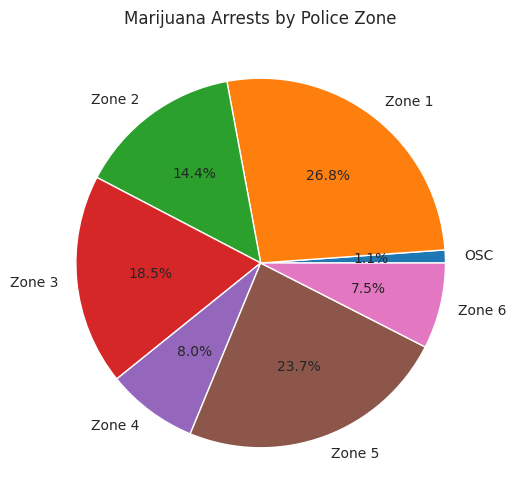

In [118]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_zone['mj_arrests_count'], labels=arrests_by_zone['INCIDENTZONE'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Police Zone')
plt.savefig('Marijuana_arrests_by_zone.png')
plt.show()

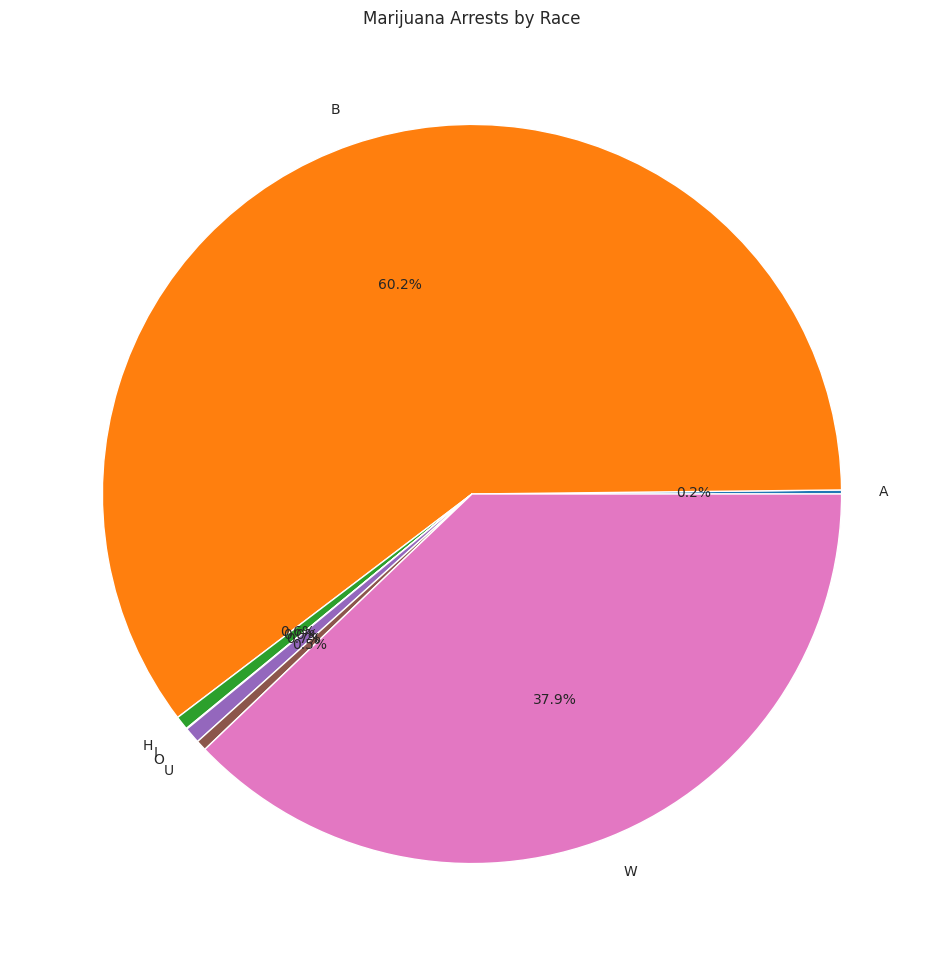

In [134]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
plt.pie(arrests_by_race['mj_arrests_count'], labels=arrests_by_race['RACE'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Race')
plt.savefig('Marijuana_arrests_by_race.png')
plt.show()

## Read WPRDC non-trafiic citation data from downloaded CSV file

In [48]:
cit_url = 'https://raw.githubusercontent.com/trailmarkerlib/policeProjectPythonWorkshop/main/data/6b11e87d-1216-463d-bbd3-37460e539d86.csv'

In [49]:
cit_df = pd.read_csv(cit_url)

In [50]:
cit_df = pd.read_csv(cit_url, low_memory = False)

### Explore citation data

#### Display information about the dataset

The info() method returns the number of rows as 'entries,' the number of columns, and the column names and datatypes.

In [51]:
cit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16070 entries, 0 to 16069
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16070 non-null  int64  
 1   PK                     16070 non-null  int64  
 2   CCR                    16070 non-null  object 
 3   GENDER                 16007 non-null  object 
 4   RACE                   15989 non-null  object 
 5   AGE                    15998 non-null  float64
 6   CITEDTIME              16070 non-null  object 
 7   INCIDENTLOCATION       16070 non-null  object 
 8   OFFENSES               16070 non-null  object 
 9   NEIGHBORHOOD           15310 non-null  object 
 10  ZONE                   16070 non-null  object 
 11  INCIDENTTRACT          15314 non-null  object 
 12  COUNCIL_DISTRICT       14240 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14240 non-null  float64
 14  X                      14279 non-null  float64
 15  Y 

#### Display the shape of the dataset: number of rows and columns

The shape property is a tuple with row and column counts: (rows, columns).

In [52]:
cit_df.shape

(16070, 16)

#### Display a set of rows from the top or bottom of the dataset

The head() method returns the first 5 rows of the dataset. If a number is entered inside the parenthesis, a corresponding number of rows from the top of the dataset is returned.

The tail() method works the same way but returns rows from the bottom of the dataset.




In [53]:
cit_df.head()

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403


In [54]:
cit_df.tail(10)

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
16060,26486,1105493,23155409,M,B,38.0,2023-09-30T02:27:00,"S 17TH ST & WRIGHTS WY PITTSBURGH, PA",601.16(b)(1)(a) Any Person who urinates or def...,NaN,3,NaN,3.0,3.0,-79.982000,40.429328
16061,26487,1105494,23155832,M,W,54.0,2023-09-30T21:02:00,"1800 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.980269,40.428487
16062,26488,1105495,23155880,M,W,35.0,2023-09-30T22:52:00,"200 Block S 9TH ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,NaN,NaN,NaN,NaN
16063,26489,1105496,23155904,F,W,26.0,2023-09-30T23:32:00,"1300 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.985178,40.428615
16064,26490,1105497,23155923,M,B,26.0,2023-10-01T01:30:00,"1500 Block E CARSON ST PITTSBURGH, PA",627.02(b)(i) Possessing a small amount of mari...,NaN,3,NaN,3.0,3.0,-79.983310,40.428693
16065,26491,1105498,23155936,F,W,51.0,2023-10-01T01:00:00,"1700 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16066,26492,1105499,23155939,M,B,18.0,2023-10-01T00:40:00,"1500 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.983310,40.428693
16067,26493,1105500,23155939,M,B,18.0,2023-10-01T00:40:00,"1500 Block E CARSON ST PITTSBURGH, PA","6308(a) Underage Purchase, Consume, Possessed ...",NaN,3,NaN,3.0,3.0,-79.983310,40.428693
16068,26494,1105501,23155955,M,W,21.0,2023-10-01T00:40:00,"300 Block NORTH SHORE DR PITTSBURGH, PA",3503(b)(1)(ii) Defiant Trespass Notice Posted ...,California-Kirkbride,1,2507,NaN,NaN,NaN,NaN
16069,26495,1105502,23155955,M,W,21.0,2023-10-01T00:40:00,"300 Block NORTH SHORE DR PITTSBURGH, PA","6308(a) Underage Purchase, Consume, Possessed ...",California-Kirkbride,1,2507,NaN,NaN,NaN,NaN


#### Display the number of unique values for a specified column

The nunique() method returns the number of unique values in the specified column.

In [55]:
cit_df._id.nunique()

16070

In [56]:
cit_df._id.head()

0    1
1    2
2    3
3    4
4    5
Name: _id, dtype: int64

In [57]:
cit_df.PK.head()

0    1078081
1    1078082
2    1078083
3    1078084
4    1078085
Name: PK, dtype: int64

#### Display the mean of a specified column

#### mean()

The mean() method returns the average of specified column.

In [58]:
cit_df.AGE.mean()

32.97974746843355

#### Display unique values for a specific column

The unique() method returns the unique values of the specified column.

In [59]:
cit_df.RACE.unique()

array(['B', 'W', nan, 'O', 'A', 'H', 'I'], dtype=object)

#### Display row counts of unique values

The value_counts() method returns the count of each non-null value for the specified column.

In [60]:
cit_df.RACE.value_counts()

W    7685
B    7402
O     584
H     165
A     143
I      10
Name: RACE, dtype: int64

In [61]:
cit_df.GENDER.unique()

array(['M', nan, 'F'], dtype=object)

In [62]:
cit_df.GENDER.value_counts()

M    11553
F     4454
Name: GENDER, dtype: int64

#### Display the number of null values

The combination of isna() and sum() returns a count of rows that are null for the whole dataset or a specified column.

In [63]:
cit_df.isna().sum()

_id                         0
PK                          0
CCR                         0
GENDER                     63
RACE                       81
AGE                        72
CITEDTIME                   0
INCIDENTLOCATION            0
OFFENSES                    0
NEIGHBORHOOD              760
ZONE                        0
INCIDENTTRACT             756
COUNCIL_DISTRICT         1830
PUBLIC_WORKS_DIVISION    1830
X                        1791
Y                        1791
dtype: int64

In [64]:
cit_df.ZONE.isna().sum()

0

In [65]:
cit_df.ZONE.unique()

array(['4', '1', '5', '2', '3', '6', 'OSC', 'SDD'], dtype=object)

In [66]:
cit_df.ZONE.value_counts()

3      5579
2      3110
4      2466
1      2159
5      1599
6      1150
OSC       6
SDD       1
Name: ZONE, dtype: int64

#### Make a copy of the dataset

Copy the dataset with the copy() method. This is good practice if you are manipulating any variables.

In [67]:
cit_df_copy = cit_df.copy()

#### Modify values in a column

In [68]:
cit_df_copy['ZONE'] = ['Zone ' + str(x) if 'nan' not in str(x) and 'OSC' not in str(x) and 'SDD' not in str(x) else x for x in cit_df_copy['ZONE']]

In [69]:
cit_df_copy.ZONE.unique()

array(['Zone 4', 'Zone 1', 'Zone 5', 'Zone 2', 'Zone 3', 'Zone 6', 'OSC',
       'SDD'], dtype=object)

In [70]:
cit_df_copy.ZONE.value_counts()

Zone 3    5579
Zone 2    3110
Zone 4    2466
Zone 1    2159
Zone 5    1599
Zone 6    1150
OSC          6
SDD          1
Name: ZONE, dtype: int64

#### Summarize the data

The describe() method displays a summary of numeric columns. Sometimes this does not make sense. Notice below that `AGE` is the only numeric column where taking the average, standard deviation, quartiles, minimum, and maximum makes sense.

In [71]:
cit_df_copy.describe()

,_id,PK,AGE,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
count,16070.000000,1.607000e+04,15998.000000,14240.000000,14240.000000,14279.000000,14279.000000
mean,11798.516304,1.092125e+06,32.979747,4.372191,3.511025,-79.979633,40.437591
std,8506.455157,8.172484e+03,14.377990,2.321716,1.556084,0.035663,0.018964
min,1.000000,1.077841e+06,0.000000,1.000000,0.000000,-80.143708,40.364826
25%,4018.250000,1.084737e+06,22.000000,3.000000,3.000000,-80.001080,40.428607
50%,10379.500000,1.092644e+06,28.000000,3.000000,3.000000,-79.983474,40.438815
75%,19956.750000,1.099258e+06,41.000000,6.000000,5.000000,-79.960916,40.449841
max,26495.000000,1.105502e+06,121.000000,9.000000,6.000000,-79.809560,40.511631


In [72]:
summary_cit_df = cit_df_copy.groupby(['ZONE']).\
            aggregate(offenses_notna_count = ('OFFENSES', 'count'),
                      offenses_total_rows = ('OFFENSES', 'size'),
                      average_age = ('AGE', 'mean'),
                      minimum_age = ('AGE', min),
                      maximum_age = ('AGE', max)).\
            reset_index().copy()

In [73]:
summary_cit_df

,ZONE,offenses_notna_count,offenses_total_rows,average_age,minimum_age,maximum_age
0,OSC,6,6,23.500000,18.0,30.0
1,SDD,1,1,47.000000,47.0,47.0
2,Zone 1,2159,2159,35.522991,0.0,85.0
3,Zone 2,3110,3110,39.078171,0.0,121.0
4,Zone 3,5579,5579,29.710867,0.0,77.0
5,Zone 4,2466,2466,29.698497,0.0,117.0
6,Zone 5,1599,1599,31.708360,0.0,83.0
7,Zone 6,1150,1150,36.501310,0.0,80.0


#### Filter the data to include only marijuana arrests between August 2016 and September 2020

In [74]:
cit_df_copy['CITEDTIME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16070 entries, 0 to 16069
Series name: CITEDTIME
Non-Null Count  Dtype 
--------------  ----- 
16070 non-null  object
dtypes: object(1)
memory usage: 125.7+ KB


In [75]:
cit_df_copy['CITEDTIME'].head()

0    2016-08-22T23:45:00
1    2016-08-22T23:45:00
2    2016-08-25T11:10:00
3    2016-08-25T16:42:00
4    2016-08-28T00:58:00
Name: CITEDTIME, dtype: object

##### Filter by dates
Use the backslash character after the dot to drop method calls to a new line.

In [76]:
subset_cit_df = cit_df_copy[(cit_df_copy['CITEDTIME'] >= "2016-01-01") & (cit_df_copy['CITEDTIME'] < "2020-09-01")].\
          copy()

In [77]:
subset_cit_df.shape

(10685, 16)

##### Filter by offenses

In [78]:
subset_cit_df['marijuana_flag'] = [1 if 'marijuana' in str(x).lower() else 0 for x in subset_cit_df['OFFENSES']]

In [79]:
subset_cit_df['paraphernalia_flag'] = [1 if 'paraphernalia' in str(x).lower() else 0 for x in subset_cit_df['OFFENSES']]

In [80]:
subset_cit_df_a = subset_cit_df.loc[subset_cit_df['marijuana_flag'] == 1].copy()

In [81]:
subset_cit_df_b = subset_cit_df.loc[subset_cit_df['paraphernalia_flag'] == 1].copy()

In [82]:
subset_cit_df_a.shape

(726, 18)

In [83]:
subset_cit_df_b.shape

(0, 18)

In [84]:
subset_cit_df['mari_para_flag'] = [1 if ('paraphernalia' in str(x).lower()) or ('marijuana' in str(x).lower()) else 0 for x in subset_cit_df['OFFENSES']]

In [85]:
mj_cit_df = subset_cit_df.loc[subset_cit_df['mari_para_flag'] == 1].copy()

In [86]:
mj_cit_df.shape

(726, 19)

In [87]:
mj_cit_df['OFFENSES'].unique()

array(['627.02(b)(i) Possessing a small amount of marijuana',
       '627.02(b)(ii) Smoking a small amount of marijuana in any public space',
       '13(a)(31)(iii) Marijuana - Distribute Small Amt/Not for Sale'],
      dtype=object)

In [88]:
mj_cit_df['OFFENSES'].isna().sum()

0

#### Summarize by police zone, race, and both

In [139]:
citations_by_zone = mj_cit_df.groupby(['ZONE']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [140]:
citations_by_zone

,ZONE,mj_citations_count
0,OSC,1
1,Zone 1,62
2,Zone 2,75
3,Zone 3,163
4,Zone 4,109
5,Zone 5,267
6,Zone 6,49


In [141]:
citations_by_race = mj_cit_df.groupby(['RACE']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [142]:
citations_by_race

,RACE,mj_citations_count
0,A,1
1,B,541
2,H,8
3,I,1
4,O,10
5,W,164


Note: The summary below does not mean anything without knowing the distribution of race in each zone.

In [144]:
citations_by_race_zone = mj_cit_df.groupby(['ZONE','RACE']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [145]:
citations_by_race_zone

,ZONE,RACE,mj_citations_count
0,OSC,B,1
1,Zone 1,B,47
2,Zone 1,O,1
3,Zone 1,W,14
4,Zone 2,A,1
5,Zone 2,B,55
6,Zone 2,H,1
7,Zone 2,O,2
8,Zone 2,W,16
9,Zone 3,B,105


#### Visualize the data

Seaborn color palettes:
https://seaborn.pydata.org/tutorial/color_palettes.html

In [91]:
# define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')

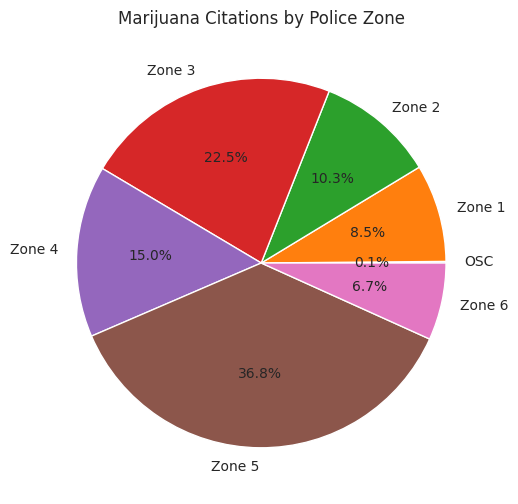

In [146]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_zone['mj_citations_count'], labels=citations_by_zone['ZONE'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Police Zone')
plt.savefig('Marijuana_citations_by_zone.png')
plt.show()

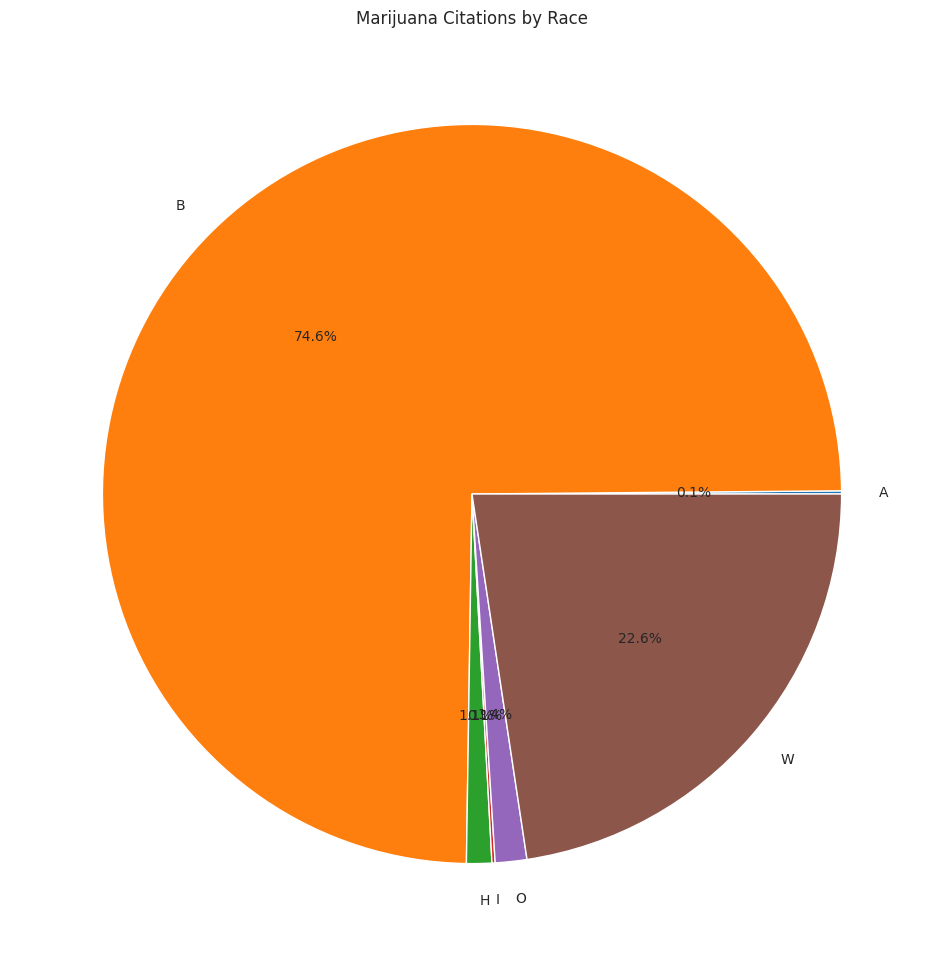

In [147]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
plt.pie(citations_by_race['mj_citations_count'], labels=citations_by_race['RACE'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Race')
plt.savefig('Marijuana_citations_by_race.png')
plt.show()